In [1]:
#import
import pandas as pd
import numpy as np

In [2]:
#df = pd.read_csv("gnb_normalize_dataset_fix.csv")
df = pd.read_csv("dataset_iklim_new.csv", delimiter=";", thousands=".", decimal=",", parse_dates=["Tanggal"], index_col="Tanggal")

df

,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car
Tanggal,,,,,,,,,,
2020-01-01,20.4,28.2,23.7,87.0,43.3,4.4,3.0,170.0,1.0,C
2020-01-02,21.2,28.8,23.8,90.0,2.6,3.9,4.0,150.0,1.0,C
2020-01-03,21.4,28.8,24.0,86.0,1.9,4.6,4.0,160.0,1.0,C
2020-01-04,21.6,28.6,24.2,86.0,2.1,3.0,4.0,290.0,1.0,C
2020-01-05,22.0,28.3,24.1,88.0,1.0,1.3,3.0,140.0,2.0,SE
...,...,...,...,...,...,...,...,...,...,...
2022-09-04,19.8,29.0,23.7,78.0,0.0,9.0,3.0,170.0,2.0,S
2022-09-05,19.4,29.3,23.8,78.0,16.4,5.7,5.0,90.0,2.0,C
2022-09-06,19.0,29.4,23.6,81.0,0.0,2.6,4.0,140.0,1.0,C


- 8888: data tidak terukur
- 9999: Tidak Ada Data (tidak dilakukan pengukuran)
- Tn: Temperatur minimum (°C)
- Tx: Temperatur maksimum (°C)
- **Tavg: Temperatur rata-rata (°C)**
- **RH_avg: Kelembapan rata-rata (%)**
- **RR: Curah hujan (mm)**
- **ss: Lamanya penyinaran matahari (jam)**
- ff_x: Kecepatan angin maksimum (m/s)
- ddd_x: Arah angin saat kecepatan maksimum (°)
- ff_avg: Kecepatan angin rata-rata (m/s)
- ddd_car: Arah angin terbanyak (°)

Next... checking datatypes

In [3]:
df = df.drop(['Tavg','ff_x','ddd_x','ff_avg','ddd_car'], axis = 1)
df

,Tn,Tx,RH_avg,RR,ss
Tanggal,,,,,
2020-01-01,20.4,28.2,87.0,43.3,4.4
2020-01-02,21.2,28.8,90.0,2.6,3.9
2020-01-03,21.4,28.8,86.0,1.9,4.6
2020-01-04,21.6,28.6,86.0,2.1,3.0
2020-01-05,22.0,28.3,88.0,1.0,1.3
...,...,...,...,...,...
2022-09-04,19.8,29.0,78.0,0.0,9.0
2022-09-05,19.4,29.3,78.0,16.4,5.7
2022-09-06,19.0,29.4,81.0,0.0,2.6


In [4]:
df = df.dropna()
df

,Tn,Tx,RH_avg,RR,ss
Tanggal,,,,,
2020-01-01,20.4,28.2,87.0,43.3,4.4
2020-01-02,21.2,28.8,90.0,2.6,3.9
2020-01-03,21.4,28.8,86.0,1.9,4.6
2020-01-04,21.6,28.6,86.0,2.1,3.0
2020-01-05,22.0,28.3,88.0,1.0,1.3
...,...,...,...,...,...
2022-09-04,19.8,29.0,78.0,0.0,9.0
2022-09-05,19.4,29.3,78.0,16.4,5.7
2022-09-06,19.0,29.4,81.0,0.0,2.6


then, drop the rows with value 8888 (data tidak terukur a.k.a not measured) and 9999 (Tidak Ada Data (tidak dilakukan pengukuran) a.k.a no data), because we don't need it. 

Based on observation above, the value with 8888 and 9999 is only in the columns with column called rr (curah hujan)

In [5]:
# delete row with 8888 value
df.drop(df[df['RR'] == 8888].index, inplace=True)
df.drop(df[df['RR'] == 9999].index, inplace=True)
df

C:\Users\akuradz\AppData\Local\Temp\ipykernel_7500\816279575.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df['RR'] == 8888].index, inplace=True)
C:\Users\akuradz\AppData\Local\Temp\ipykernel_7500\816279575.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df['RR'] == 9999].index, inplace=True)


,Tn,Tx,RH_avg,RR,ss
Tanggal,,,,,
2020-01-01,20.4,28.2,87.0,43.3,4.4
2020-01-02,21.2,28.8,90.0,2.6,3.9
2020-01-03,21.4,28.8,86.0,1.9,4.6
2020-01-04,21.6,28.6,86.0,2.1,3.0
2020-01-05,22.0,28.3,88.0,1.0,1.3
...,...,...,...,...,...
2022-09-04,19.8,29.0,78.0,0.0,9.0
2022-09-05,19.4,29.3,78.0,16.4,5.7
2022-09-06,19.0,29.4,81.0,0.0,2.6


In [6]:
# get mean of Tn and Tx, assign to new column called "TnTxAvg"
df["TAvg"] = (df["Tn"] + df["Tx"]) / 2
df.drop(['Tn','Tx'], axis = 1, inplace=True)
# df["curahHujanPerTahun"] = (df["RR"]) / 365
# df[df["RR"] > 50]


C:\Users\akuradz\AppData\Local\Temp\ipykernel_7500\388052998.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["TAvg"] = (df["Tn"] + df["Tx"]) / 2
C:\Users\akuradz\AppData\Local\Temp\ipykernel_7500\388052998.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Tn','Tx'], axis = 1, inplace=True)


In [42]:
df_mean = pd.DataFrame()
df_mean['tempratur'] = df.TAvg.resample('M').mean().ffill()
df_mean['kelembapan_udara'] = df.RH_avg.resample('M').mean().ffill()
df_mean['lama_penyinaran'] = df.ss.resample('M').mean().ffill()
df_mean['curah_hujan'] = df.RR.resample('M').sum().ffill()
df_mean.head(10)
# df_mean.tail(5)

# print(df_mean.shape)

,tempratur,kelembapan_udara,lama_penyinaran,curah_hujan
Tanggal,,,,
2020-01-31,25.135000,82.133333,5.026667,327.3
2020-02-29,25.039655,84.724138,4.803448,502.4
2020-03-31,25.266129,82.838710,5.416129,238.8
2020-04-30,25.279310,79.551724,6.500000,154.2
2020-05-31,25.006897,79.965517,6.224138,135.7
2020-06-30,23.771667,75.300000,7.560000,3.2
2020-07-31,23.098333,75.833333,7.750000,17.4
2020-08-31,23.663636,73.000000,8.109091,55.3
2020-09-30,24.500000,73.352941,8.247059,5.4


array([<AxesSubplot:xlabel='Tanggal', ylabel='Nilai'>,
       <AxesSubplot:xlabel='Tanggal', ylabel='Nilai'>,
       <AxesSubplot:xlabel='Tanggal', ylabel='Nilai'>,
       <AxesSubplot:xlabel='Tanggal', ylabel='Nilai'>], dtype=object)

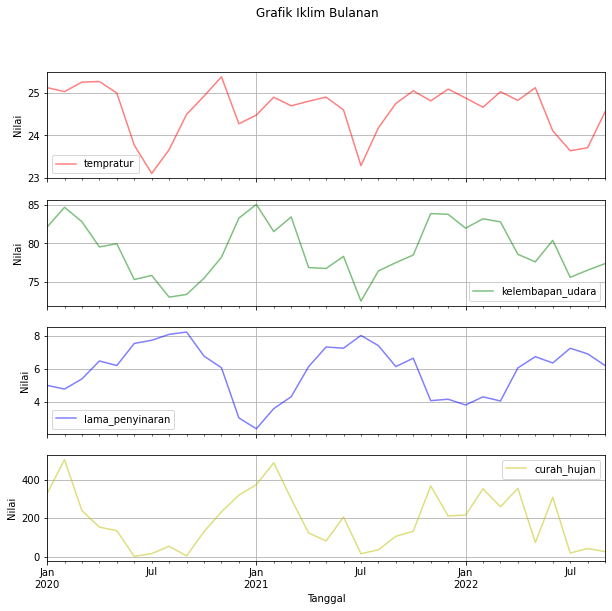

In [43]:
df_mean.plot(
    subplots=True,
    figsize=(10, 9),
    title="Grafik Iklim Bulanan",
    xlabel="Tanggal",
    ylabel="Nilai",
    grid=True,
    legend=True,
    style=["r", "g", "b", "y"],
    alpha=0.5,
)


In [44]:
# create new column with three categorical level value 0, 1, 2 based on rr value

labels = ['BURUK','BAIK']

good_temprature = [25, 30]
good_kelembapan = [75, 95]
good_lamapenyinaran = [7,9]
good_curahhujan = [83, 250]

# df['tn_level'] = pd.cut(df['tn'], bins=3, labels=labels)
# df['tx_level'] = pd.cut(df['tx'], bins=3, labels=labels)
# init empty dataframe
df_discreted = pd.DataFrame()
# if t_avg is range inside good_temprature, assign to new column tavg_level
df_discreted['tempratur'] = np.where((df_mean['tempratur'] >= good_temprature[0]) & (df_mean['tempratur'] <= good_temprature[1]), 'BAIK', 'BURUK')
df_discreted['kelembapan'] = np.where((df_mean['kelembapan_udara'] >= good_kelembapan[0]) & (df_mean['kelembapan_udara'] <= good_kelembapan[1]), 'BAIK', 'BURUK')
df_discreted['curah_hujan'] = np.where((df_mean['curah_hujan'] >= good_curahhujan[0]) & (df_mean['curah_hujan'] <= good_curahhujan[1]), 'BAIK', 'BURUK')
df_discreted['lama_penyinaran'] = np.where((df_mean['lama_penyinaran'] >= good_lamapenyinaran[0]) & (df_mean['lama_penyinaran'] <= good_lamapenyinaran[1]), 'BAIK', 'BURUK')
df_discreted['presentase'] = 0
df_discreted['peluang_pertumbuhan'] = 'UNKNOWN'

# df_mean['ss_level'] = pd.cut(df_mean['ss'], bins=3, labels=labels)
# df_mean['ff_x_level'] = pd.cut(df_mean['ff_x'], bins=3, labels=labels)
# df_mean['ddd_x_level'] = pd.cut(df_mean['ddd_x'], bins=3, labels=labels)
# df_mean['ff_avg_level'] = pd.cut(df_mean['ff_avg'], bins=3, labels=labels)

# df_mean.drop(['tavg','rh_avg','rr','ss'], axis = 1, inplace=True)

df_discreted.tail(7)


,tempratur,kelembapan,curah_hujan,lama_penyinaran,presentase,peluang_pertumbuhan
26,BAIK,BAIK,BURUK,BURUK,0,UNKNOWN
27,BURUK,BAIK,BURUK,BURUK,0,UNKNOWN
28,BAIK,BAIK,BURUK,BURUK,0,UNKNOWN
29,BURUK,BAIK,BURUK,BURUK,0,UNKNOWN
30,BURUK,BAIK,BURUK,BAIK,0,UNKNOWN
31,BURUK,BAIK,BURUK,BURUK,0,UNKNOWN
32,BURUK,BAIK,BURUK,BURUK,0,UNKNOWN


In [48]:

# iterate each row in dataframe
for index, row in df_discreted.iterrows():
    # count value with TINGGI value
    tinggi = 0

    # loop each column in dataframe
    for col in range(3):
        # check if value is TINGGI
        if row[col] == 'BAIK':
            tinggi += 1
  
    # calculate probability
    prob = tinggi / 4
    # set row column presentase with probability value
    
    df_discreted.loc[index, 'presentase'] = prob

    df_discreted.loc[index, 'peluang_pertumbuhan'] = 'BURUK' if prob < 0.5 else 'BAIK' 

# df_discreted.tail(7)
# if discreted['peluang_pertumbuhan'] is 'BURUK', assign to new column 'peluang_pertumbuhan' with value 0 else 1
df_mean['peluang_pertumbuhan'] = np.where(df_discreted['peluang_pertumbuhan'] == 'BURUK', 0, 1)

In [49]:
x = df_mean[['tempratur','kelembapan_udara','lama_penyinaran','curah_hujan']]
print(x.dtypes)
y = df_mean['peluang_pertumbuhan']
print(x)

tempratur           float64
kelembapan_udara    float64
lama_penyinaran     float64
curah_hujan         float64
dtype: object
            tempratur  kelembapan_udara  lama_penyinaran  curah_hujan
Tanggal                                                              
2020-01-31  25.135000         82.133333         5.026667        327.3
2020-02-29  25.039655         84.724138         4.803448        502.4
2020-03-31  25.266129         82.838710         5.416129        238.8
2020-04-30  25.279310         79.551724         6.500000        154.2
2020-05-31  25.006897         79.965517         6.224138        135.7
2020-06-30  23.771667         75.300000         7.560000          3.2
2020-07-31  23.098333         75.833333         7.750000         17.4
2020-08-31  23.663636         73.000000         8.109091         55.3
2020-09-30  24.500000         73.352941         8.247059          5.4
2020-10-31  24.931667         75.466667         6.793333        130.8
2020-11-30  25.391667         78.2

In [50]:
# separate the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((26, 4), (7, 4), (26,), (7,))

In [39]:
# Penskalaan tidak ada pengaruhnya
# from sklearn.preprocessing import MinMaxScaler
# # print(x_train)
# scaler = MinMaxScaler()
# x_train_scaled = scaler.fit_transform(x_train)
# x_test_scaled = scaler.transform(x_test)

In [51]:
# import the model using multinomial naive bayes
# print(x_train)
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
# train the model
gnb.fit(x_train, y_train)
# predict the model
y_pred = gnb.predict(x_test)
# import the metrics
from sklearn import metrics

# print the accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7142857142857143


In [52]:
y_pred

array([0, 0, 1, 0, 1, 0, 1])

Akurasi: 0.7142857142857143
Error: 0.2857142857142857
Presisi: 1.0
Sensitivitas: 0.6
Spesifisitas: 1.0
F1 Score: 0.7499999999999999


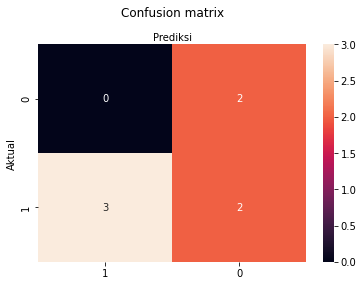

In [53]:
# plot naive bayes confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


cnf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cnf_matrix.ravel()

#accuracy
accuracy = (tp + tn) / (tp + tn + fp + fn)
# misclassification error
misclassificationerror = 1 - accuracy
#precision
precision = tp / (tp + fp)
#sensitivity(recall)
sensitivity = tp / (tp + fn)
# specificity
specificity = tn / (tn + fp)
#f1 score
f1score = 2 * ((precision * sensitivity) / (precision + sensitivity))

labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
_ = sns.heatmap([[fp, tn], [tp, fn]], annot = True, fmt = 'd', xticklabels = [1,0], yticklabels = [0,1])
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Aktual')
plt.xlabel('Prediksi')

print('Akurasi:', accuracy)
print('Error:', misclassificationerror)
print('Presisi:', precision)
print('Sensitivitas:', sensitivity)
print('Spesifisitas:', specificity)
print('F1 Score:', f1score)


In [56]:
# Example Data:
# Tempratur Udara = 26 derajat
# Kelembapan Udara = 80%
# Lama Penyinaran perhari = 7 jam
# Curah Hujan = 100 mm

tempratur = 25
kelembapan = 86
lama_penyinaran = 7
curah_hujan = 120

new_data = np.array([[tempratur, kelembapan, lama_penyinaran, curah_hujan]])

result_classes = ['BURUK', 'BAIK']
y_new_pred = gnb.predict(new_data)

print('Tempratur Udara =', new_data[0][0], 'derajat')
print('Kelembapan Udara =', new_data[0][1], '%')
print('Lama Penyinaran perhari =', new_data[0][2], 'jam')
print('Curah Hujan =', new_data[0][3], 'mm/bulan')
print(result_classes[y_new_pred[0]])

prob_new_x = gnb.predict_proba(new_data)
print(prob_new_x)


Tempratur Udara = 25 derajat
Kelembapan Udara = 86 %
Lama Penyinaran perhari = 7 jam
Curah Hujan = 120 mm/bulan
BAIK


C:\Users\akuradz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
